In [1]:
import os as os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from tqdm import tqdm

In [21]:
chunks_folder = 'chucks/chucks'

In [14]:
# Contains less chunks
chunks_folder = 'ReducedChunks'

In [22]:
# put all chunks in one file
final_data = pd.DataFrame()

chunk_data = []

for file in tqdm(os.listdir(chunks_folder)):
    if file.endswith('.csv'):
        file_path = os.path.join(chunks_folder, file)
        data = pd.read_csv(file_path)
        chunk_data.append(data)

final_data = pd.concat(chunk_data, ignore_index=True)
final_data.to_csv('data.csv', index=False)

100%|██████████| 172/172 [00:18<00:00,  9.12it/s]


In [23]:
data = pd.read_csv('data.csv', sep=';')
data

,timestamps_UTC,mapped_veh_id,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,temperature,precipitation,windspeed_10m,sum_pollen
0,2023-08-01 03:44:12,181.0,50.769818,3.872114,27.0,23.0,255.0,238.0,794.0,801.0,83.0,81.0,76.0,77.0,14.8,0.0,18.6,0.1
1,2023-08-01 06:36:29,143.0,51.039993,3.693429,33.0,32.0,272.0,324.0,802.0,804.0,78.0,78.0,73.0,74.0,14.4,0.0,19.1,1.1
2,2023-08-24 06:53:54,183.0,50.742203,3.602035,31.0,33.0,234.0,182.0,799.0,802.0,82.0,82.0,85.0,87.0,18.2,0.0,12.1,2.4
3,2023-08-01 13:53:38,177.0,50.930914,5.327132,35.0,38.0,220.0,244.0,794.0,801.0,77.0,81.0,78.0,82.0,19.9,0.2,25.0,12.6
4,2023-08-24 07:02:30,143.0,51.180773,3.575259,41.0,34.0,227.0,282.0,806.0,800.0,85.0,78.0,82.0,79.0,18.7,0.0,9.7,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17100347,2023-01-28 08:39:57,145.0,51.038288,3.756774,29.0,16.0,341.0,327.0,1417.0,1353.0,81.0,82.0,83.0,85.0,0.6,0.0,5.6,0.0
17100348,2023-01-28 08:43:03,191.0,50.930731,5.327744,27.0,26.0,289.0,276.0,795.0,801.0,77.0,79.0,70.0,72.0,0.6,0.0,5.6,0.0
17100349,2023-01-28 08:42:49,104.0,50.056842,4.492362,6.0,17.0,217.0,303.0,804.0,797.0,76.0,53.0,77.0,54.0,0.6,0.0,5.6,0.0
17100350,2023-01-28 08:45:21,186.0,51.246188,5.542875,36.0,38.0,162.0,200.0,801.0,800.0,77.0,83.0,77.0,80.0,0.6,0.0,5.6,0.0


In [66]:
data = pd.read_csv('chucks/chucks/chuck_0.csv', sep=';')
data

,timestamps_UTC,mapped_veh_id,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,temperature,precipitation,windspeed_10m,sum_pollen
0,2023-08-01 03:44:12,181.0,50.769818,3.872114,27.0,23.0,255.0,238.0,794.0,801.0,83.0,81.0,76.0,77.0,14.8,0.0,18.6,0.1
1,2023-08-01 06:36:29,143.0,51.039993,3.693429,33.0,32.0,272.0,324.0,802.0,804.0,78.0,78.0,73.0,74.0,14.4,0.0,19.1,1.1
2,2023-08-24 06:53:54,183.0,50.742203,3.602035,31.0,33.0,234.0,182.0,799.0,802.0,82.0,82.0,85.0,87.0,18.2,0.0,12.1,2.4
3,2023-08-01 13:53:38,177.0,50.930914,5.327132,35.0,38.0,220.0,244.0,794.0,801.0,77.0,81.0,78.0,82.0,19.9,0.2,25.0,12.6
4,2023-08-24 07:02:30,143.0,51.180773,3.575259,41.0,34.0,227.0,282.0,806.0,800.0,85.0,78.0,82.0,79.0,18.7,0.0,9.7,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2023-04-03 16:05:20,186.0,51.215074,4.421298,28.0,32.0,175.0,203.0,804.0,798.0,77.0,82.0,75.0,82.0,9.3,0.0,18.1,165.2
99996,2023-04-03 16:05:32,146.0,51.015562,3.774646,20.0,10.0,269.0,331.0,803.0,796.0,66.0,61.0,61.0,56.0,9.3,0.0,18.1,165.2
99997,2023-04-03 16:04:54,160.0,50.868371,3.814284,13.0,25.0,265.0,224.0,798.0,806.0,67.0,78.0,70.0,76.0,9.3,0.0,18.1,165.2
99998,2023-04-03 16:15:30,142.0,51.174112,4.901368,26.0,33.0,200.0,186.0,805.0,805.0,80.0,85.0,87.0,84.0,9.3,0.0,18.1,165.2


In [24]:
# Dif of columns
df = pd.read_csv('chucks/chucks/chuck_0.csv', sep=';')

df['RS_E_InAirTemp_diff'] = df['RS_E_InAirTemp_PC1'] - df['RS_E_InAirTemp_PC2']
df['RS_E_OilPress_diff'] = df['RS_E_OilPress_PC1'] - df['RS_E_OilPress_PC2']
df['RS_E_RPM_diff'] = df['RS_E_RPM_PC1'] - df['RS_E_RPM_PC2']
df['RS_E_WatTemp_diff'] = df['RS_E_WatTemp_PC1'] - df['RS_E_WatTemp_PC2']
df['RS_T_OilTemp_diff'] = df['RS_T_OilTemp_PC1'] - df['RS_T_OilTemp_PC2']

df = df.drop(columns=['RS_E_InAirTemp_PC1', 'RS_E_InAirTemp_PC2', 'RS_E_OilPress_PC1', 'RS_E_OilPress_PC2',
                      'RS_E_RPM_PC1', 'RS_E_RPM_PC2', 'RS_E_WatTemp_PC1', 'RS_E_WatTemp_PC2',
                      'RS_T_OilTemp_PC1', 'RS_T_OilTemp_PC2'])

df.to_csv("chunk1Diff.csv", sep=";", index=False)

In [25]:
data = pd.read_csv('chunk1Diff.csv', sep=';')
data

,timestamps_UTC,mapped_veh_id,lat,lon,temperature,precipitation,windspeed_10m,sum_pollen,RS_E_InAirTemp_diff,RS_E_OilPress_diff,RS_E_RPM_diff,RS_E_WatTemp_diff,RS_T_OilTemp_diff
0,2023-08-01 03:44:12,181.0,50.769818,3.872114,14.8,0.0,18.6,0.1,4.0,17.0,-7.0,2.0,-1.0
1,2023-08-01 06:36:29,143.0,51.039993,3.693429,14.4,0.0,19.1,1.1,1.0,-52.0,-2.0,0.0,-1.0
2,2023-08-24 06:53:54,183.0,50.742203,3.602035,18.2,0.0,12.1,2.4,-2.0,52.0,-3.0,0.0,-2.0
3,2023-08-01 13:53:38,177.0,50.930914,5.327132,19.9,0.2,25.0,12.6,-3.0,-24.0,-7.0,-4.0,-4.0
4,2023-08-24 07:02:30,143.0,51.180773,3.575259,18.7,0.0,9.7,2.1,7.0,-55.0,6.0,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2023-04-03 16:05:20,186.0,51.215074,4.421298,9.3,0.0,18.1,165.2,-4.0,-28.0,6.0,-5.0,-7.0
99996,2023-04-03 16:05:32,146.0,51.015562,3.774646,9.3,0.0,18.1,165.2,10.0,-62.0,7.0,5.0,5.0
99997,2023-04-03 16:04:54,160.0,50.868371,3.814284,9.3,0.0,18.1,165.2,-12.0,41.0,-8.0,-11.0,-6.0
99998,2023-04-03 16:15:30,142.0,51.174112,4.901368,9.3,0.0,18.1,165.2,-7.0,14.0,0.0,-5.0,3.0


In [ ]:
columns_of_interest = ['RS_E_InAirTemp_PC1', 'RS_E_InAirTemp_PC2', 'RS_E_OilPress_PC1',
                         'RS_E_OilPress_PC2', 'RS_E_RPM_PC1', 'RS_E_RPM_PC2', 'RS_E_WatTemp_PC1',
                         'RS_E_WatTemp_PC2', 'RS_T_OilTemp_PC1', 'RS_T_OilTemp_PC2', 'temperature',
                         'precipitation', 'windspeed_10m', 'sum_pollen']

X = data[columns_of_interest].values

In [26]:
# For diff
columns_of_interest = ['RS_E_InAirTemp_diff', 'RS_E_OilPress_diff', 'RS_E_RPM_diff',
                        'RS_E_WatTemp_diff', 'RS_T_OilTemp_diff', 'temperature',
                        'precipitation', 'windspeed_10m', 'sum_pollen']

X = data[columns_of_interest].values


9it [00:16,  1.86s/it]


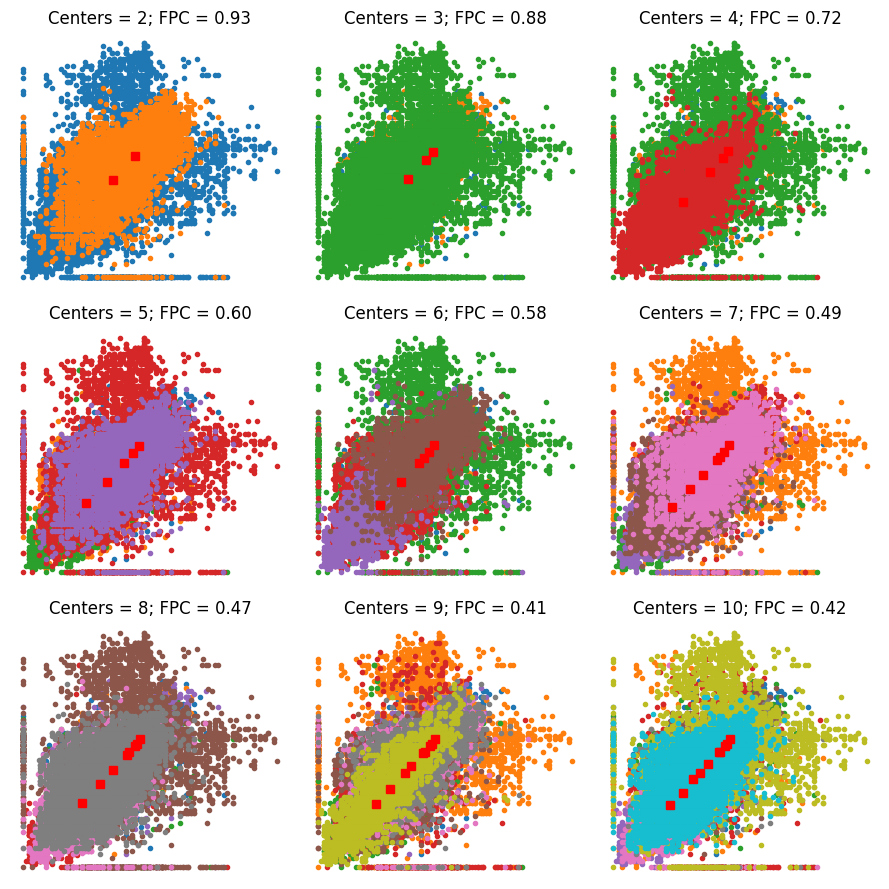

In [35]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(9, 9))
alldata = X.T
fpcs = []

for ncenters, ax in tqdm(enumerate(axes1.reshape(-1), 2)):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.05, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(X[cluster_membership == j, 0],
                X[cluster_membership == j, 1], '.')

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

Text(0, 0.5, 'Fuzzy partition coefficient')

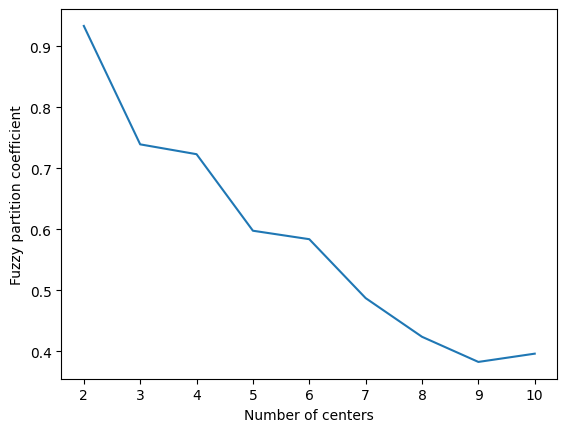

In [6]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")

In [58]:
# Parameters of Fuzzy C-means
n_clusters = 2
m = 2
error_threshold = 0.005

# Execution of Fuzzy C-means
centers, u, _, _, _, _, fpc = fuzz.cluster.cmeans(
    X.T, n_clusters, m, error=error_threshold, maxiter=1000, init=None
)

fpc

0.933469611091918

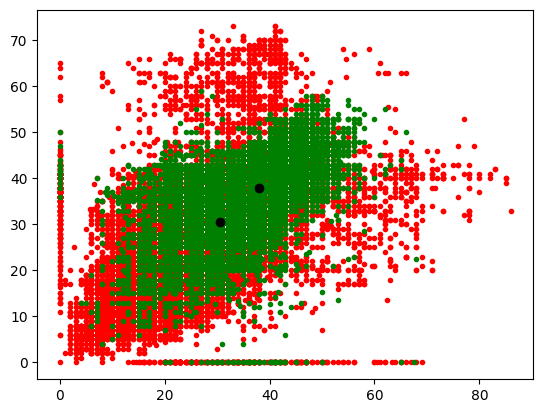

In [68]:
cluster_membership = np.argmax(u, axis=0)

colors = ["r.", "g.", "b."]
for i in range(n_clusters):
    plt.plot(X[cluster_membership == i, 0], X[cluster_membership == i, 1], colors[i])

# centers of cluster
for j in range(n_clusters):
    plt.plot(centers[j, 0], centers[j, 1], "ko")

plt.show()

In [69]:
cluster_indices = np.argmax(u, axis=0)

elements_par_cluster = np.bincount(cluster_indices)

for cluster_num, count in enumerate(elements_par_cluster):
    print(f"Cluster {cluster_num + 1}: {count} éléments")

Cluster 1: 80863 éléments
Cluster 2: 19137 éléments


In [80]:
# mean of each cluster
columns_of_interest = ['RS_E_InAirTemp_PC1', 'RS_E_InAirTemp_PC2', 'RS_E_OilPress_PC1',
                         'RS_E_OilPress_PC2', 'RS_E_RPM_PC1', 'RS_E_RPM_PC2', 'RS_E_WatTemp_PC1',
                         'RS_E_WatTemp_PC2', 'RS_T_OilTemp_PC1', 'RS_T_OilTemp_PC2', 'temperature',
                         'precipitation', 'windspeed_10m', 'sum_pollen']

data_for_clustering = data[['cluster'] + columns_of_interest]

X = data_for_clustering[columns_of_interest].values.T

n_clusters = 2
m = 2
error_threshold = 0.005

centers, u, _, _, _, _, fpc = fuzz.cluster.cmeans(
    X, n_clusters, m, error=error_threshold, maxiter=1000, init=None
)

cluster_indices = np.argmax(u, axis=0)

cluster_means = data_for_clustering.groupby('cluster').mean()

cluster_means

,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,temperature,precipitation,windspeed_10m,sum_pollen
cluster,,,,,,,,,,,,,,
0,30.412896,30.452183,247.877297,250.894243,797.453738,791.459123,76.838512,76.062042,75.839705,75.286933,14.766467,0.104257,13.099943,21.877795
1,37.867085,37.821976,370.058693,376.877029,1586.340001,1587.010477,84.003675,83.199166,85.501573,85.234618,15.467534,0.101233,13.217234,21.531891
